In [19]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from src import support as sp



#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_flight = pd.read_csv('../Files/Customer Flight Activity.csv')
df_loyalty = pd.read_csv('../Files/Customer Loyalty History.csv')

In [20]:
# REMOVING DUPLICATES IF ANY

df_flight = sp.remove_duplicate_rows(df_flight)

print('--------')

df_loyalty = sp.remove_duplicate_rows(df_loyalty)

There were 405624 rows, and 1864 duplicated rows were deleted.
New row count: 403760 rows
--------
There were 16737 rows, and 0 duplicated rows were deleted.
New row count: 16737 rows


In [21]:
# FLOAT TO INTEGER FLIGHTS

# f_convert_to_int = ['Year']
# df_flight = sp.float_to_integer(df_flight, f_convert_to_int)
# df_flight.dtypes 

In [22]:
# FLOAT TO INTEGER LOYALTY

l_convert_to_int = ['Cancellation Year', 'Cancellation Month']


df_loyalty = sp.float_to_integer (df_loyalty, l_convert_to_int)
df_loyalty.dtypes # CONFIRMATION

Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year       Int64
Cancellation Month      Int64
dtype: object

In [23]:
# REMOVING NEGATIVE VALUES FROM SALARY

df_loyalty['Salary'] = df_loyalty['Salary'].abs()

df_loyalty['Salary'].min() # CONFIRMATION


9081.0

In [24]:
df_loyalty['Salary'].isna().sum()

4238

In [25]:
df_loyalty[df_loyalty['Salary'].isnull()].sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
9212,419377,Canada,Manitoba,Winnipeg,R2C 0M5,Male,College,NaN,Divorced,Nova,14635.45,Standard,2013,1,<NA>,<NA>
9475,471944,Canada,New Brunswick,Fredericton,E3B 2H2,Male,College,NaN,Married,Nova,19837.31,Standard,2015,3,2015,11
11318,956402,Canada,Manitoba,Winnipeg,R2C 0M5,Male,College,NaN,Married,Star,2615.91,Standard,2013,5,<NA>,<NA>
12096,608493,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3095.71,Standard,2013,4,<NA>,<NA>
11052,562644,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,College,NaN,Married,Star,2554.55,Standard,2013,8,<NA>,<NA>


In [34]:
df = df_flight.merge(df_loyalty, on= 'Loyalty Number', how= 'left')

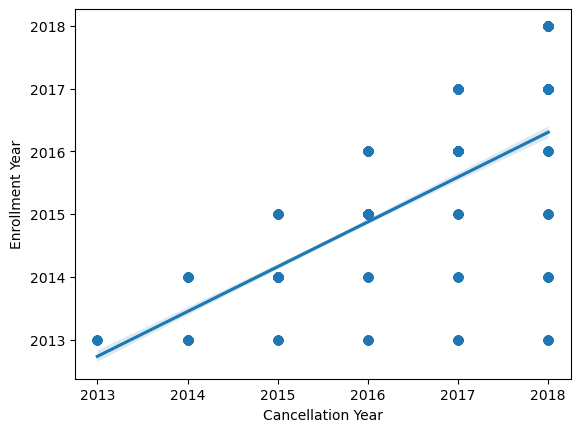

In [27]:
sns.regplot(data=df_loyalty, y='Enrollment Year', x='Cancellation Year')
plt.title = 'Enrollment Year & Cancellation Year'


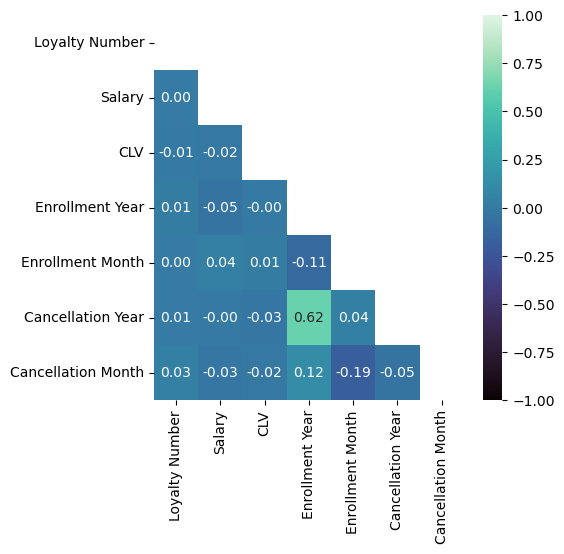

In [28]:
numerics = df_loyalty.select_dtypes(exclude = 'O').columns
df_corr = df_loyalty[numerics].corr(method = 'spearman')


plt.figure(figsize = (5, 5))

mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

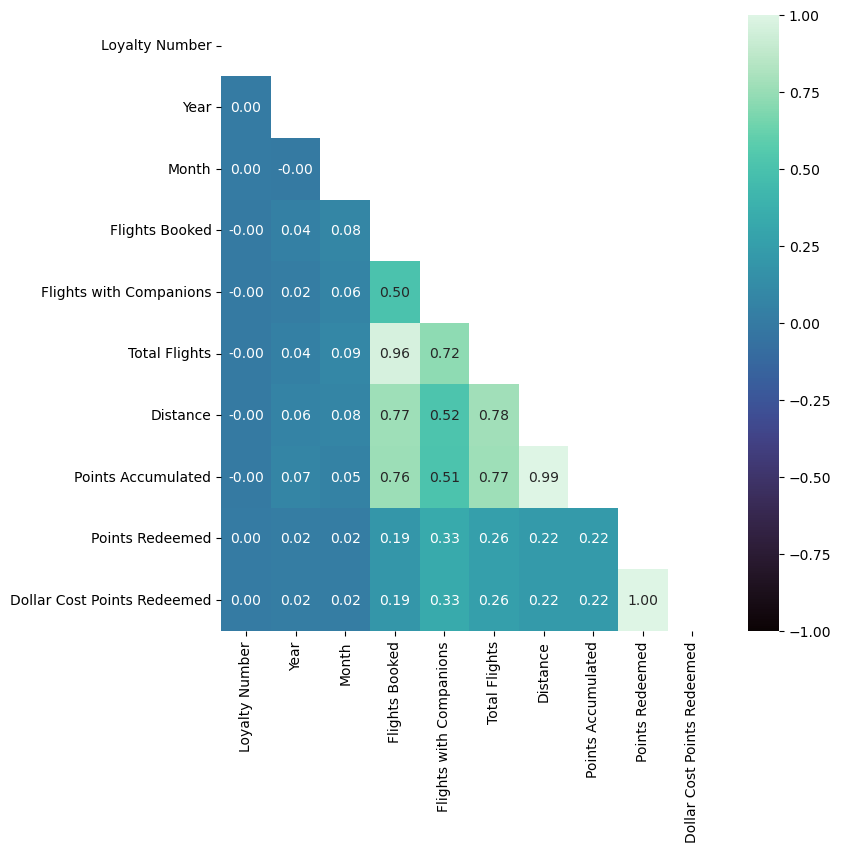

In [29]:
numerics = df_flight.select_dtypes(exclude = 'O').columns
df_corr = df_flight[numerics].corr(method = 'pearson')


plt.figure(figsize = (8, 8))

mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

In [ ]:
df_loyalty['Salary Scale'] = pd.cut(df_loyalty['Salary'],bins = 3, labels= ['Low', 'Medium', 'High']) # SETTING CATEGORIES TO GROUP AND COMPARE

In [31]:
df_loyalty['Salary Scale'].dtype

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True, categories_dtype=object)

<Axes: xlabel='Points Accumulated', ylabel='Distance'>

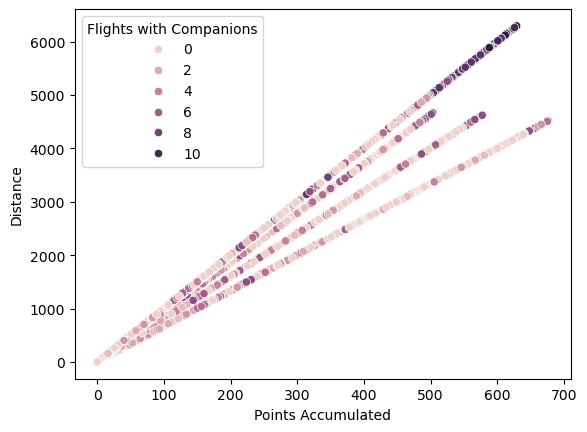

In [32]:
sns.scatterplot(data=df_flight, y='Distance', x='Points Accumulated', hue='Flights with Companions' )

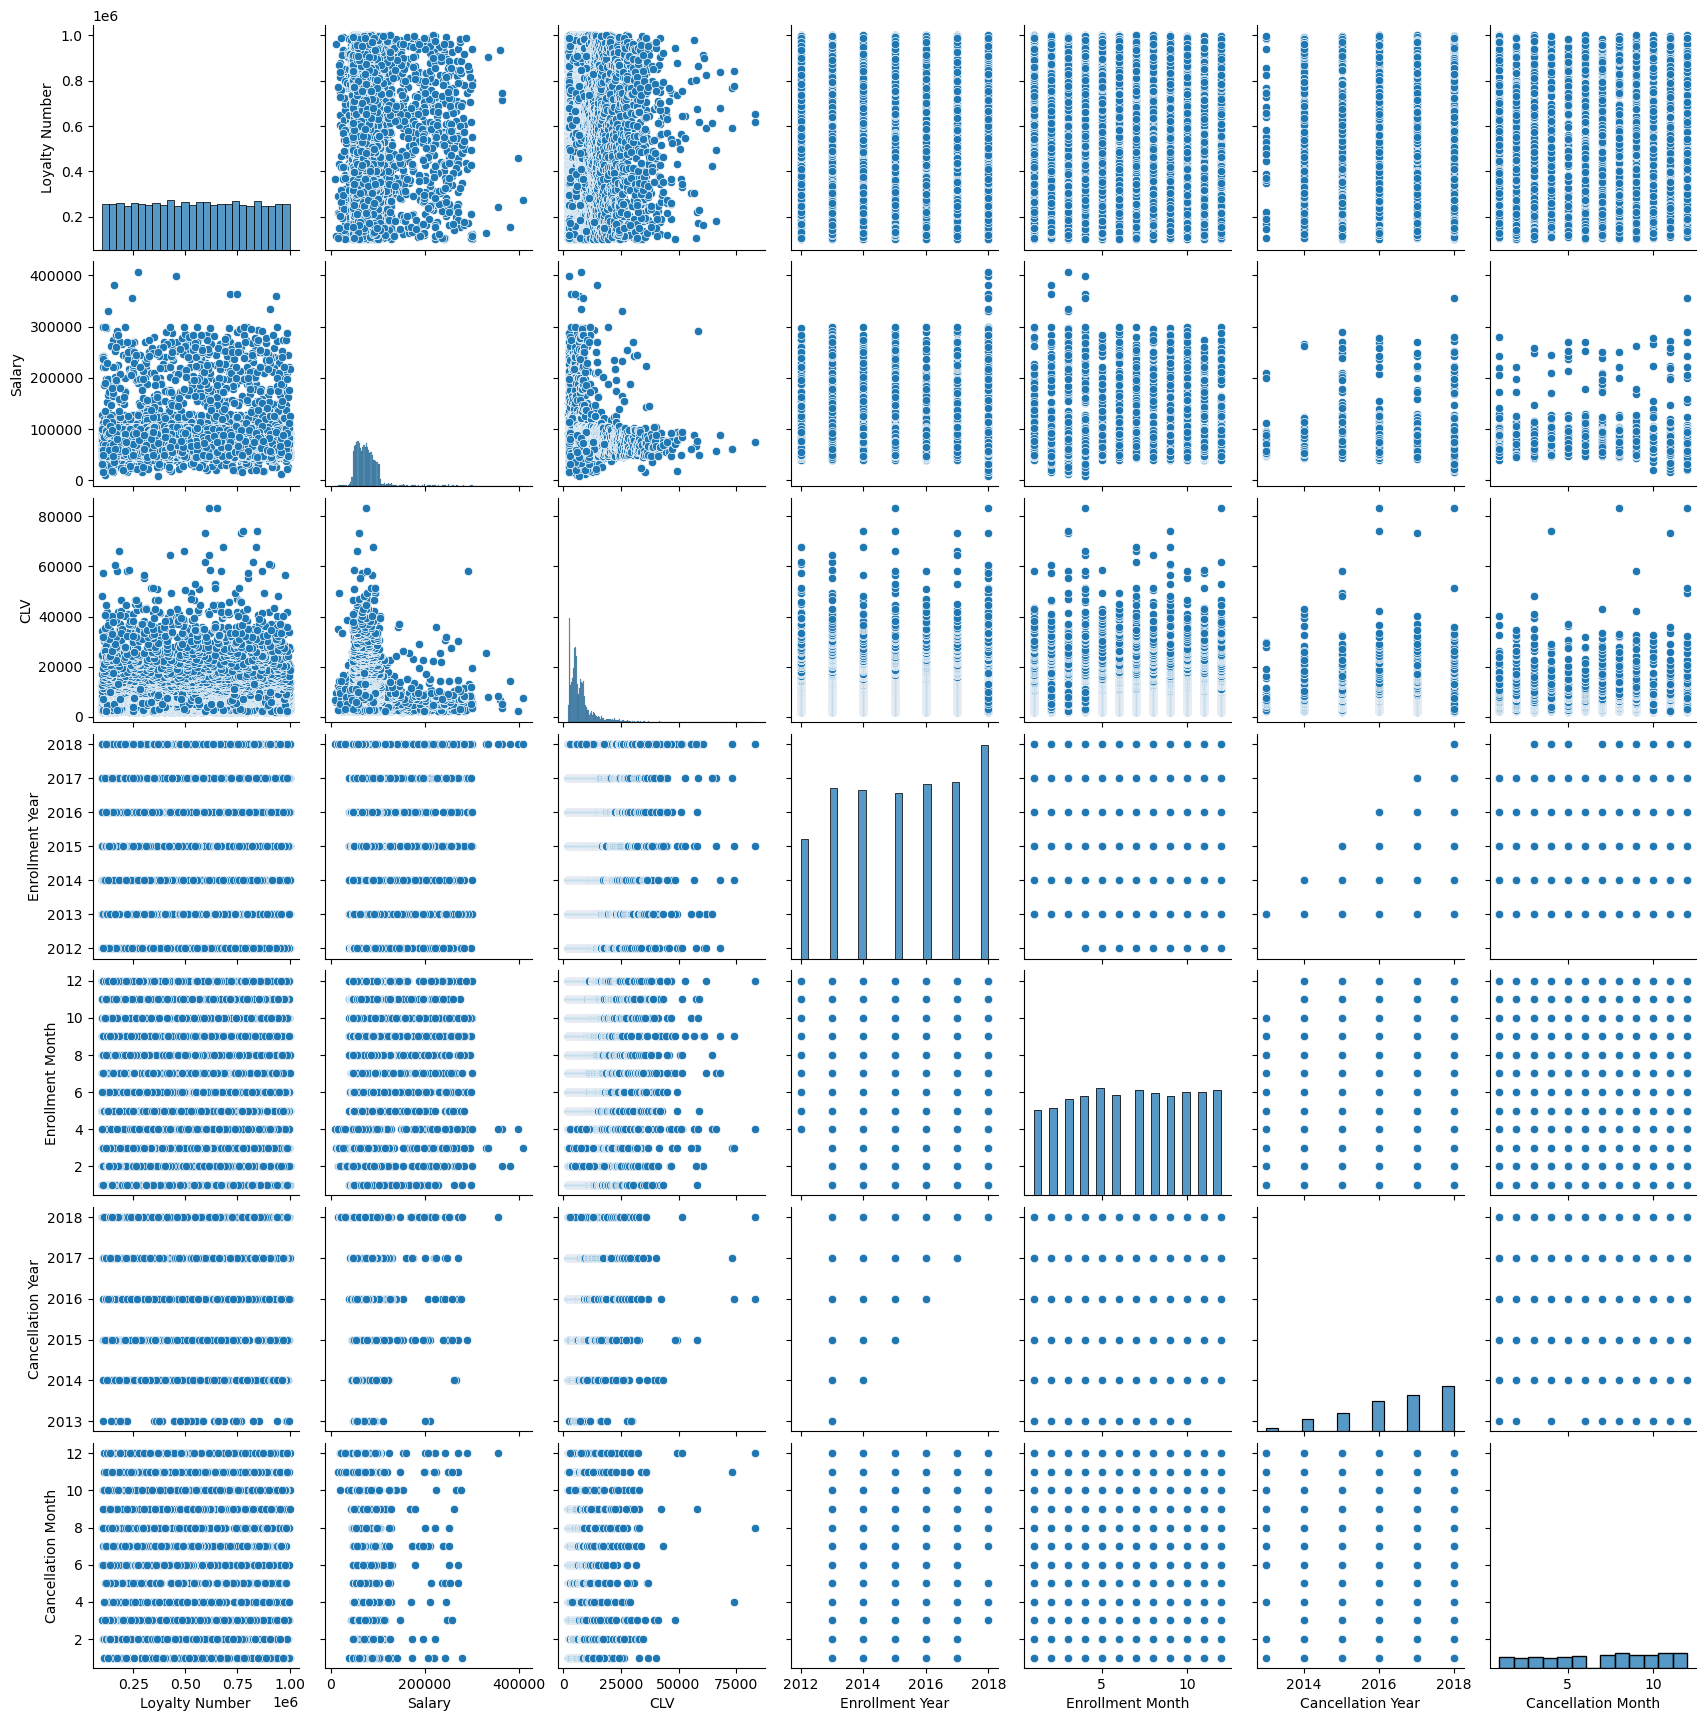

In [33]:
sns.pairplot( data=df_loyalty)

In [49]:
def num_and_num (df, col1, col2):
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.scatterplot(x=df[col1], y=df[col2], ax=axes[0])
    sns.regplot(x=df[col1], y=df[col2], ax=axes[1])
    plt.show()

In [51]:
def num_and_cate(df, num_col, cate_col):
    sns.boxplot(x=cate_col, y=num_col, data=df)
    plt.title(f'Correlation of {cate_col} and {num_col}')
    
    

In [ ]:
num_and_cate(df, 'Salary Scale', 'Loyalty Number')